In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.PropertyMol import PropertyMol
Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)
import pickle
import sys
from pathlib import Path

In [7]:
sys.path.append('/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/kinase_focused_fragment_library/analysis/ligand_analysis')
sys.path.append('/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/kinase_focused_fragment_library/recombination')
from construct_ligand import construct_ligand, read_fragment_library

In [3]:
def pickle_loader(pickle_file):

    try:
        while True:
            yield pickle.load(pickle_file)
    except EOFError:
        pass

In [4]:
combinatorial_library_folder = Path('/home/paula/Masterarbeit/CombinatorialLibrary_manuscript/')
file_name = combinatorial_library_folder / 'combinatorial_library.pickle'

In [5]:
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']
data = read_fragment_library(Path('/home/paula/Masterarbeit/FragmentLibrary'), subpockets)

Number of fragments in AP : 230
Number of fragments in FP : 254
Number of fragments in SE : 160
Number of fragments in GA : 100
Number of fragments in B1 : 23
Number of fragments in B2 : 34


In [17]:
count_original = 0
count_original_sub = 0
chembl_match = 0
with open(file_name, 'rb') as pickle_file:
    
    for i, ligand in enumerate(pickle_loader(pickle_file)):
    
        count_original += ligand.original
        count_original_sub += ligand.original_sub
        chembl_match += ligand.chembl_match

In [18]:
count_original, count_original_sub, chembl_match

(43, 167, 168)

In [19]:
# chembl matches
chembl_ligands = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        #if ligand.mwt == 0 and ligand.lipinski == 0:
        if ligand.chembl_match == 1:
            count += 1
            print(count, i+1)
            chembl_ligands.append(ligand)

1 2673232
2 2684101
3 2689336
4 2711959
5 2713730
6 2786398
7 2835168
8 2896806
9 2919995
10 2925972
11 2931558
12 2949945
13 2973378
14 2975462
15 2992750
16 3013106
17 3013497
18 3065276
19 3069749
20 3087536
21 3088771
22 3098639
23 3116449
24 3142928
25 3163174
26 3217886
27 3245463
28 3252626
29 3260112
30 3266752
31 3279868
32 3281342
33 3282688
34 3291573
35 3296288
36 3301307
37 3304587
38 3309635
39 3312343
40 3333981
41 3364144
42 3369533
43 3395807
44 3407738
45 3444191
46 3462276
47 3496293
48 3509547
49 3514073
50 3518066
51 3527583
52 3540701
53 3547920
54 3555822
55 3577635
56 3587727
57 3601887
58 11151986
59 15395852
60 15411461
61 15412351
62 15420472
63 15426386
64 15443210
65 15446920
66 15458123
67 15475974
68 15477274
69 15478235
70 15482809
71 15483235
72 15508383
73 15509508
74 15512704
75 15513164
76 15519843
77 15521084
78 15529034
79 15537856
80 15539676
81 15547982
82 15555669
83 15557742
84 15560506
85 15561590
86 15563853
87 15569610
88 15570352
89 1557125

In [22]:
chembl_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(construct_ligand(ligand.meta, data))) for ligand in chembl_ligands]

In [24]:
# [(i, Chem.MolToSmiles(mol))for i, mol in enumerate(chembl_mols)]
for mol in chembl_mols:
    print(Chem.MolToSmiles(mol))

NC(=O)Nc1sc(-c2ccsc2)cc1C(=O)N[C@H]1CCC[NH2+]C1
COc1ccc(C(=O)Nc2ccccc2)cc1
O=C(Nc1ccccc1)C1CCCCC1
O=C(Nc1ccccc1)NC1CCCCC1
Cc1nc(-c2ccccc2)n2nc(NC3CCCCC3)ncc12
O=C(Nc1ccc(Cl)cc1)c1csc(-c2ccccc2)n1
Cc1ccc(C(=O)[O-])o1
O=C(Nc1ccc(N2CC[NH2+]CC2)cc1)c1ccc(Cl)cc1
O=C(Nc1ccccc1)c1cscn1
O=C(Nc1ccccc1)c1cnn2ccccc12
O=C(Nc1ccc(Cl)cc1)Nc1nc2ccccc2s1
COc1ccc(C(=O)Nc2nc3ccccc3s2)cc1
C[NH+](C)c1nc(C(=O)[O-])nc(N2CCOCC2)n1
Cc1nc(-c2ccccc2)n2nc(Nc3ccc(S(N)(=O)=O)cc3)ncc12
COc1ccc(C(=O)Nc2ccc(C(=O)c3ccccc3)cc2)cc1
O=C(NC1CCCCC1)c1csc(-c2ccccc2)n1
Cn1c(=O)[nH]c(=O)c2c1nc1n(CCO)c(-c3ccccc3)cn21
COc1ccc(NC(=O)Nc2nc3ccccc3s2)cc1
NC(=O)c1nc(N2CCOCC2)nc([NH+]2CCOCC2)n1
CCCCn1c(-c2ccccc2)cn2c3c(=O)[nH]c(=O)n(C)c3nc12
COc1ccc(NC(=O)Nc2ccccc2)cc1
O=C(NCC[NH+]1CCOCC1)Nc1ccccc1
CC(C)[N@H+]1CC[C@H](NC(=O)NC2CCCCC2)CC1
Cc1cc(C)cc(C(=O)Nc2ccccc2)c1
Cn1cc(C(=O)Nc2ccccc2)c2ccccc21
O=C([O-])Cc1csc(NC(=O)c2ccco2)n1
c1ccc(Nc2nc(-c3cccs3)cs2)nc1
NS(=O)(=O)c1ccc(NC(=O)Nc2ccccc2)cc1
CS(=O)(=O)N1CCC(C(=O)Nc2ccccc2)CC1
O=C(Nc

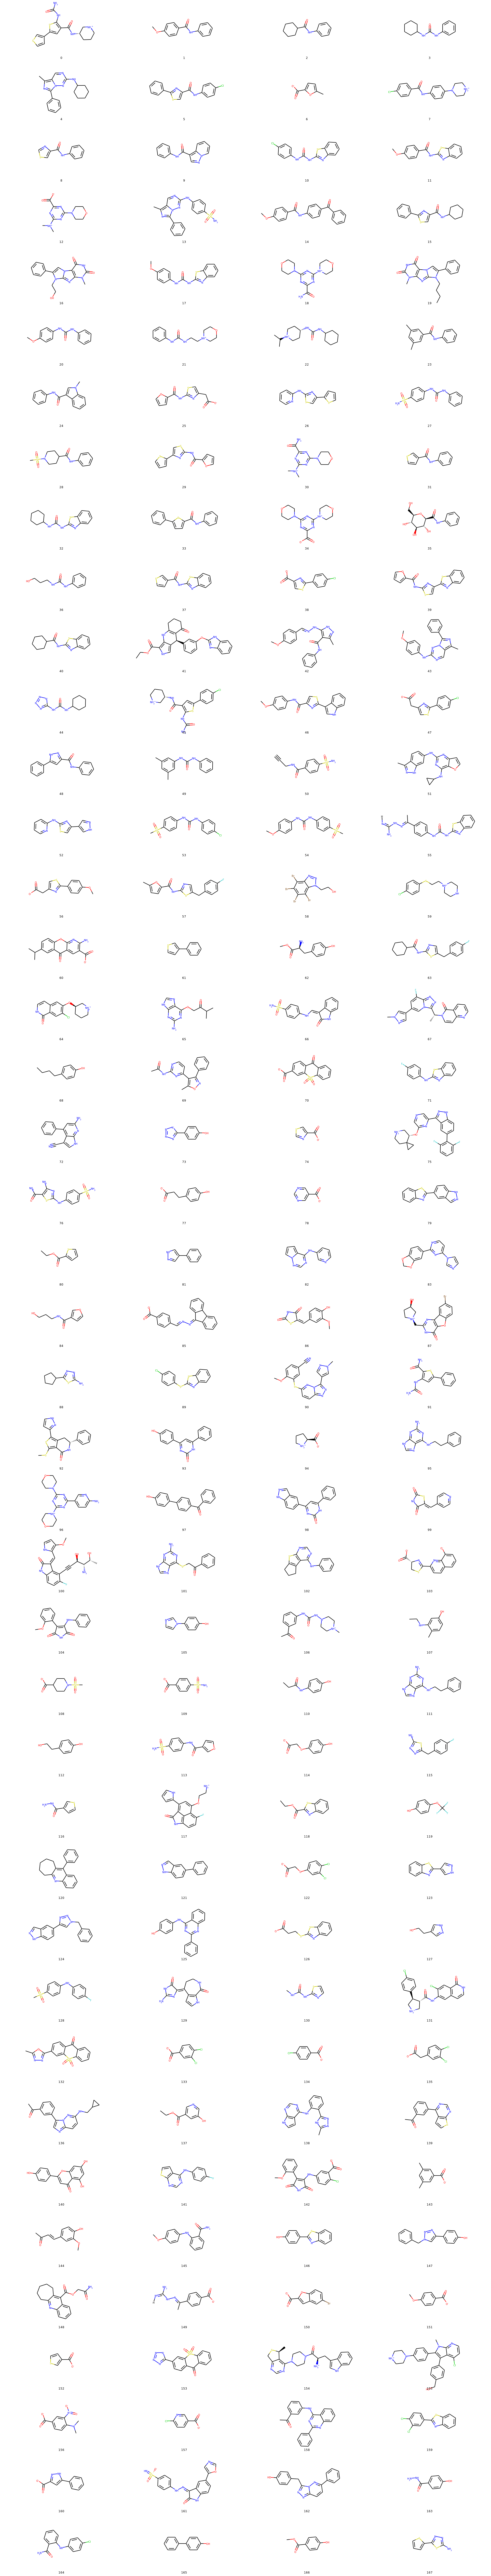

In [26]:
Draw.MolsToGridImage(chembl_mols, molsPerRow=4, maxMols=200, subImgSize=(500, 250), legends=[str(i) for i in range(len(chembl_mols))])

In [27]:
# klifs matches
original_ligands = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        if ligand.original == 1:
            count += 1
            print(count, i+1)
            original_ligands.append(ligand)

1 3005919
2 3034216
3 3369533
4 3540701
5 15412351
6 15458123
7 15489904
8 15497104
9 15513084
10 15519843
11 15521084
12 15523811
13 15529680
14 15543218
15 15546747
16 15560512
17 15563853
18 15573923
19 15586339
20 15597262
21 15598299
22 15601043
23 15614518
24 15636786
25 15648412
26 15652506
27 15695521
28 15702072
29 15718487
30 15733985
31 15739100
32 15747116
33 15758401
34 15765127
35 15768153
36 15789981
37 15790109
38 15819364
39 15832758
40 15835312
41 15838829
42 15868910
43 15877933


In [30]:
original_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(construct_ligand(ligand.meta, data))) for ligand in original_ligands]

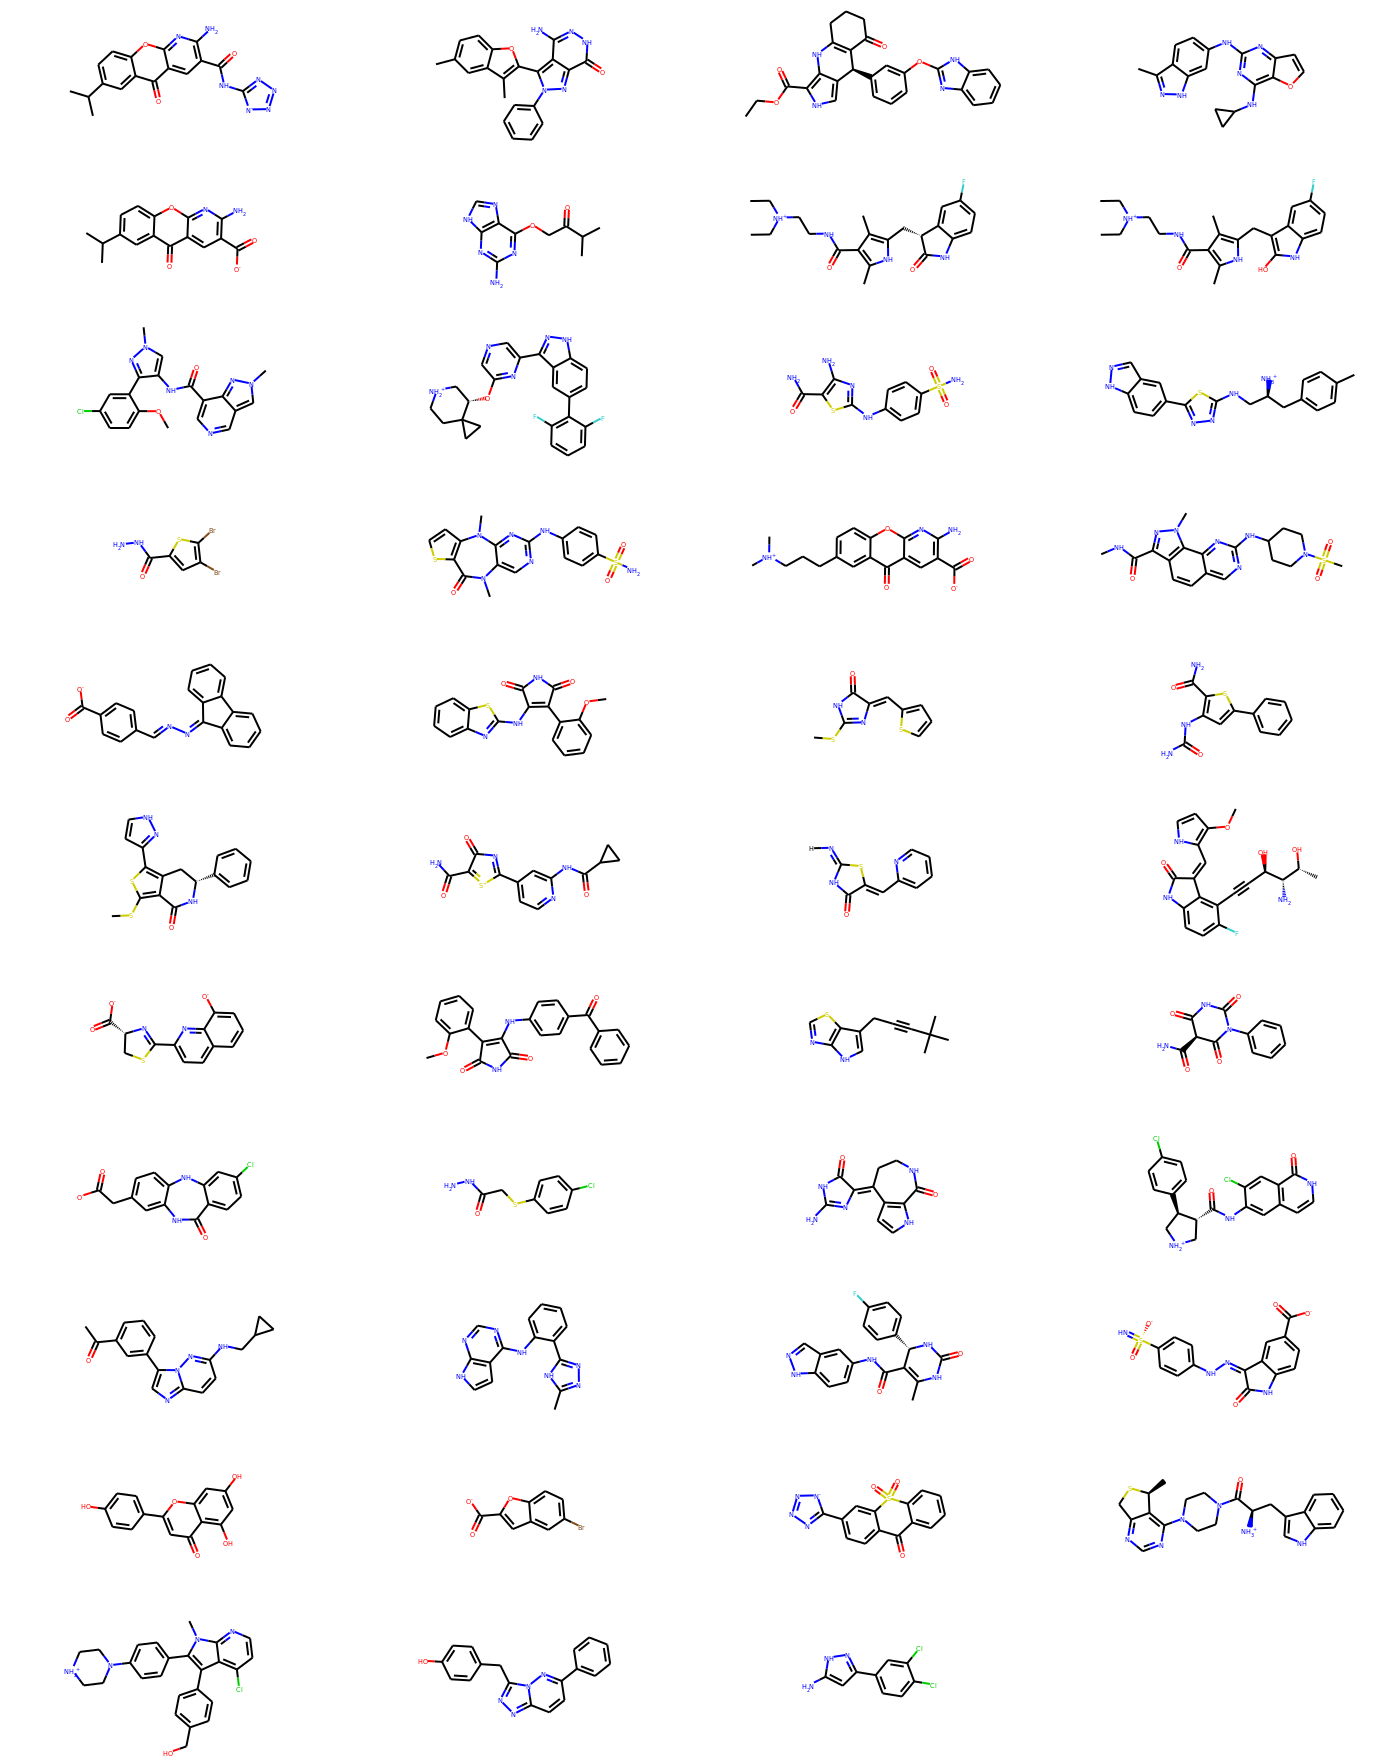

In [31]:
Draw.MolsToGridImage(original_mols, molsPerRow=4, maxMols=150, subImgSize=(350, 160))

In [32]:
# novel ligand fulfilling all conditions
lst = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        if ligand.original == 0 and ligand.original_sub == 0 and ligand.chembl_match == 0 and ligand.lipinski == 1 and \
            ligand.hbd == 1 and ligand.hba == 1 and ligand.mwt == 1 and ligand.logp == 1:
            lst.append(i+1)

In [53]:
# select a certain novel ligand
with open(file_name, 'rb') as pickle_file:
    
    for i in range(lst[10000]):
        ligand = next(pickle_loader(pickle_file))

In [54]:
# # select any ligand
# with open(file_name, 'rb') as pickle_file:
    
#     #612 (not drug like)
#     for i in range(233):
#         ligand = next(pickle_loader(pickle_file))

In [62]:
mol = construct_ligand(ligand.meta, data)

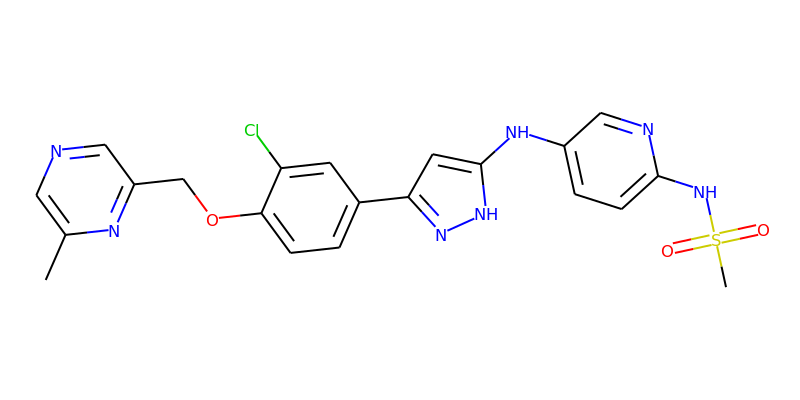

In [63]:
AllChem.Compute2DCoords(mol)
# Draw.MolsToGridImage([mol], subImgSize=(400, 250), molsPerRow=1)
Draw.MolsToGridImage([Chem.MolFromSmiles(Chem.MolToSmiles(mol))], subImgSize=(800, 400), molsPerRow=1)

In [58]:
ligand.original, ligand.original_sub, ligand.chembl_match

(0, 0, 0)

In [59]:
ligand.lipinski, ligand.hba, ligand.hbd, ligand.mwt, ligand.logp

(1, 1, 1, 1, 1)

In [60]:
highlightAtomLists = []
legends = []
for subpocket in ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']:
    highlight_atoms = []
    legend = subpocket
    for atom in mol.GetAtoms():
        if atom.HasProp('subpocket'):
            if atom.GetProp('subpocket') == subpocket:
                highlight_atoms.append(atom.GetIdx())
                legend = subpocket + ': '+atom.GetProp('frag_id')
    highlightAtomLists.append(highlight_atoms)
    legends.append(legend)

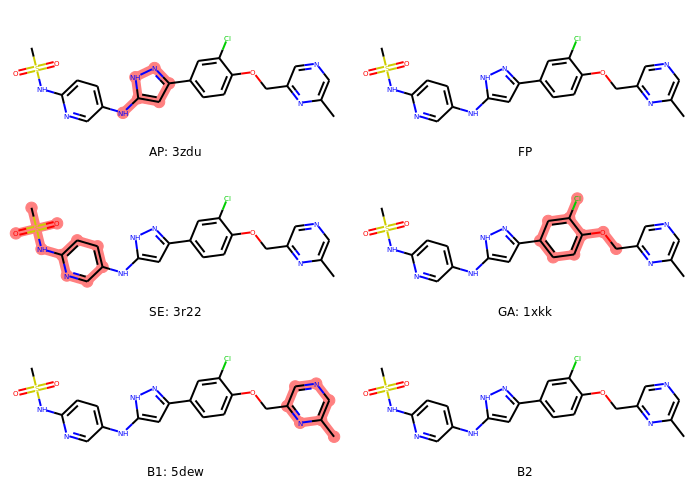

In [61]:
Draw.MolsToGridImage([mol, mol, mol, mol, mol, mol], 
                     highlightAtomLists=highlightAtomLists, legends=legends, molsPerRow=2, subImgSize=(350, 160))